In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 2 (80-10-10).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,11,59,32,8,58,7,69,...,18,20,0,32,0,8,98.4,53.3,109,Train
2008-01-02,411032,357,3211,0,51,0,0,46,6,61,...,10,19,5,39,7,5,90.8,53.0,108,Train
2008-01-03,414332,344,3153,0,57,7,24,58,6,61,...,38,28,6,30,0,0,89.5,53.4,106,Train
2008-01-04,395900,338,3184,0,51,6,9,58,6,66,...,25,22,8,45,0,8,82.6,56.4,106,Train
2008-01-05,366387,369,2964,0,57,0,7,57,6,63,...,16,22,5,47,0,9,79.8,57.2,106,Train


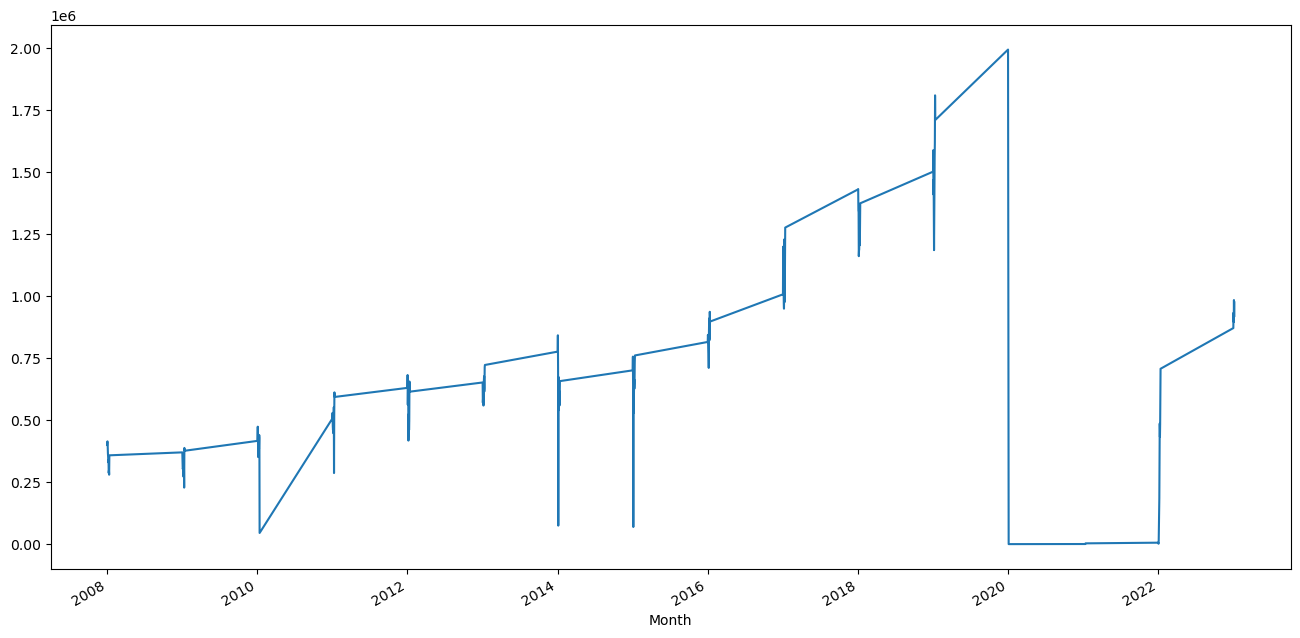

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Month                                                              
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            Airbnb Vietnam  Vietnam restaurant  Shopping in Hanoi  \
Month                                         

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.22 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.21 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.44 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.07 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.16 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.09 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/04/2020'].dropna()
test = df1['Tourist Arrival']['01/05/2020':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/04/2020'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/05/2020':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19681D+01    |proj g|=  1.47210D-04


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   26      4      7      1     0     0   7.515D-06   1.197D+01
  F =   11.967663329423797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  148
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1771.214
Date:                            Wed, 23 Aug 2023   AIC                           3594.428
Time:                                    21:38:35   BIC                           3669.965
Sample:                                         0   HQIC                          3625.125
                                            - 148                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number of Posts            80.2549    462.405      0.174      0.862    -826.043     986.553
Number of Comments         41.5978     44.253      0.940      0.347     -45.136     128.332
Airbnb Vietnam           -810.0516   2613.308     -0.310      0.757   -5932.040    4311.937
Vietnam restaurant       3909.6256   2862.692      1.366      0.172   -1701.148    9520.399
Shopping in Hanoi         247.5615   3125.764      0.079      0.937   -5878.823    6373.946
Shopping in Ho Chi Minh   920.2732   3140.607      0.293      0.770   -5235.203    7075.750
 Vietnam tour            1650.5568   4201.484      0.393      0.694   -6584.201    9885.314
 Skyscanner              7887.7681   4951.715      1.593      0.111   -1817.415    1.76e+04
 Vietnam visa            3983.3499   4404.774      0.904      0.366   -4649.849    1.26e+04
 Vietnam airport        -1518.4295   3930.639     -0.386      0.699   -9222.340    6185.481
 Vietnam flights        -1382.4733   4042.171     -0.342      0.732   -9304.984    6540.037
 Danang airport           368.1789   1760.831      0.209      0.834   -3082.986    3819.344
 Hoi An                 -2710.5500   2151.288     -1.260      0.208   -6926.996    1505.896
 Vietnam weather         -435.4805   2025.512     -0.215      0.830   -4405.412    3534.451
 Visa for Vietnam        1244.4421   4528.903      0.275      0.783   -7632.045    1.01e+04
 Sgn airport             1671.0124   2403.300      0.695      0.487   -3039.368    6381.393
 Phu Quoc                3680.2006   2171.180      1.695      0.090    -575.234    7935.636
 Vietnam itinerary      -2511.8581   2932.914     -0.856      0.392   -8260.263    3236.547
 Vietnam trip            3795.6224   2061.370      1.841      0.066    -244.589    7835.833
 Things to do in Hue     3728.1244   3689.816      1.010      0.312   -3503.781     1.1e+04
 Vietnam backpackers    -6030.7358   3525.243     -1.711      0.087   -1.29e+04     878.614
CCI                     -3991.7036   4971.872     -0.803      0.422   -1.37e+04    5752.987
PMI                     -2157.9281   6287.315     -0.343      0.731   -1.45e+04    1.02e+04
REERI                   -7447.2868    1.1e+04     -0.679      0.497   -2.89e+04    1.41e+04
ar.S.L12                    0.3910      0.085      4.575      0.000       0.224       0.559
sigma2                   1.458e+10      0.007   2.06e+12      0.000    1.46e+10    1.46e+10
===================================================================================
Ljung-Box (L1) (Q):                  15.81   Jarque-Bera (JB):               130.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.29
Prob(H) (two-sided):                  0.83   Kurtosis:                         7.78
=============================================

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 294616.9733910808


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 228996.0569743297


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.0293865635746506e+20


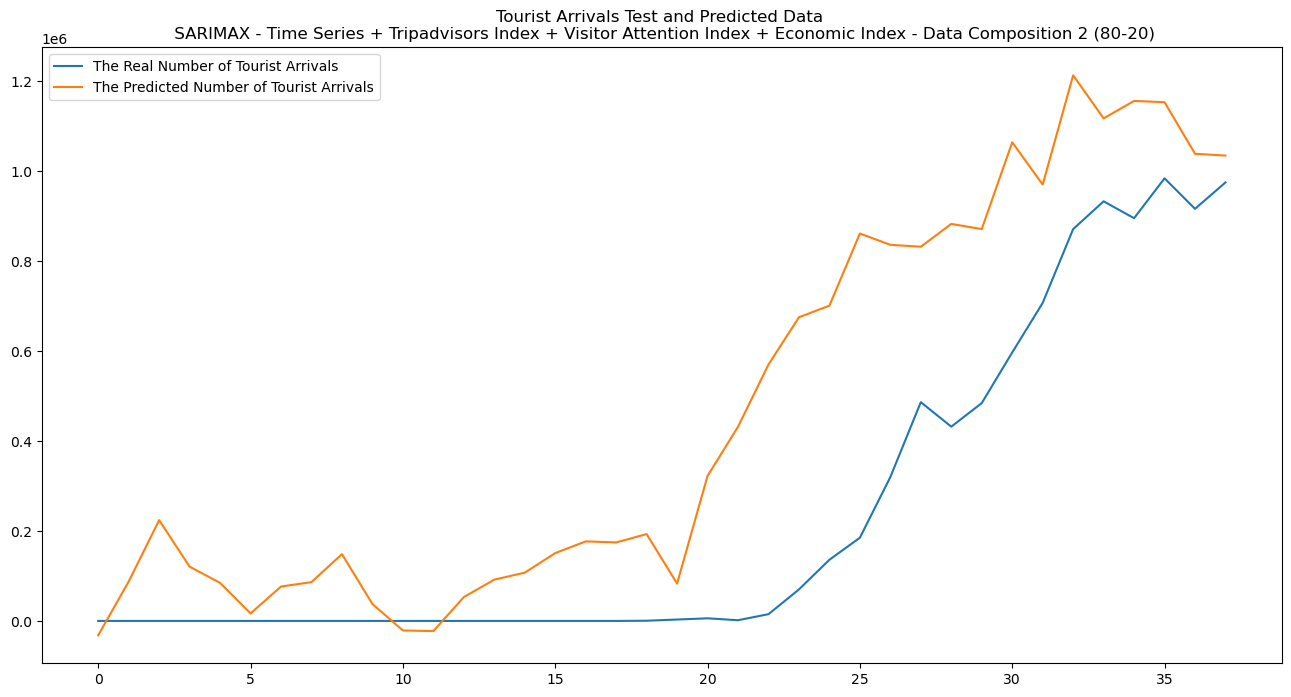

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Visitor Attention Index + Economic Index - Data Composition 2 (80-20)")
plt.legend()
plt.show()